## Preparación del ambiente

In [37]:
import pandas as pd
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [11]:

catalogo_paises = pd.read_csv(r'/home/dasher0n/Descargas/raiavl_mensual_exportacion_csv/catalogos/tc_pais_destino.csv')
diccionario_paises = dict(zip(catalogo_paises['ID_PAIS_DESTINO'], catalogo_paises['DESC_PAIS_DESTINO']))

In [12]:
folder_path = 'conjunto_de_datos//'
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]
df_total = pd.concat([pd.read_csv(os.path.join(folder_path, file)) for file in csv_files], ignore_index=True)
df_total.head()

print(f"Se importaron {len(csv_files)} archivos y el DataFrame resultante tiene {df.shape[0]} filas.")


Se importaron 21 archivos y el DataFrame resultante tiene 165180 filas.


In [13]:
df_total

,PROD_EST,COBERTURA,ANIO,ID_MES,MARCA,MODELO,TIPO,SEGMENTO,ID_PAIS_DESTINO,UNI_VEH
0,Registro Administrativo de la Industria Automo...,Nacional,2009,1,Chrysler,Crew Cab-,Camiones ligeros,Pick Ups,40,0
1,Registro Administrativo de la Industria Automo...,Nacional,2009,1,Chrysler,Crew Cab-,Camiones ligeros,Pick Ups,66,0
2,Registro Administrativo de la Industria Automo...,Nacional,2009,1,Chrysler,Crew Cab-,Camiones ligeros,Pick Ups,999,0
3,Registro Administrativo de la Industria Automo...,Nacional,2009,1,Chrysler,Journey,Camiones ligeros,SUV's,40,167
4,Registro Administrativo de la Industria Automo...,Nacional,2009,1,Chrysler,Journey,Camiones ligeros,SUV's,66,975
...,...,...,...,...,...,...,...,...,...,...
165175,Registro Administrativo de la Industria Automo...,Nacional,2018,12,Volkswagen,Tiguan-,Camiones ligeros,SUV's,175,42
165176,Registro Administrativo de la Industria Automo...,Nacional,2018,12,Volkswagen,Tiguan-,Camiones ligeros,SUV's,187,0
165177,Registro Administrativo de la Industria Automo...,Nacional,2018,12,Volkswagen,Tiguan-,Camiones ligeros,SUV's,219,0
165178,Registro Administrativo de la Industria Automo...,Nacional,2018,12,Volkswagen,Tiguan-,Camiones ligeros,SUV's,224,0


## Analisis Descriptivo

In [14]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165180 entries, 0 to 165179
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   PROD_EST         165180 non-null  object
 1   COBERTURA        165180 non-null  object
 2   ANIO             165180 non-null  int64 
 3   ID_MES           165180 non-null  int64 
 4   MARCA            165180 non-null  object
 5   MODELO           165180 non-null  object
 6   TIPO             165180 non-null  object
 7   SEGMENTO         165180 non-null  object
 8   ID_PAIS_DESTINO  165180 non-null  int64 
 9   UNI_VEH          165180 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 12.6+ MB


In [15]:
df_total.describe()

,ANIO,ID_MES,ID_PAIS_DESTINO,UNI_VEH
count,165180.000000,165180.000000,165180.000000,165180.000000
mean,2018.311212,6.505285,121.745514,304.722297
std,4.999798,3.487291,164.931914,1599.094535
min,2005.000000,1.000000,3.000000,-3228.000000
25%,2015.000000,3.000000,42.000000,0.000000
50%,2020.000000,7.000000,66.000000,0.000000
75%,2022.000000,10.000000,172.000000,17.000000
max,2025.000000,12.000000,999.000000,39281.000000


## Tratamiento de Nulos

In [16]:
# Conteo de valores nulos por columna
nulos = df_total.isnull().sum()
print("Conteo de valores nulos por columna:")
print(nulos)

# Estadísticas descriptivas generales
print("\nEstadísticas descriptivas generales:")
print(df_total.describe())

# Media de cada columna numérica
media = df_total.mean(numeric_only=True)
print("\nMedia de cada columna numérica:")
print(media)

# Mediana de cada columna numérica
mediana = df_total.median(numeric_only=True)
print("\nMediana de cada columna numérica:")
print(mediana)

# Moda de cada columna
moda = df_total.mode().iloc[0]
print("\nModa de cada columna:")
print(moda)

Conteo de valores nulos por columna:
PROD_EST           0
COBERTURA          0
ANIO               0
ID_MES             0
MARCA              0
MODELO             0
TIPO               0
SEGMENTO           0
ID_PAIS_DESTINO    0
UNI_VEH            0
dtype: int64

Estadísticas descriptivas generales:
                ANIO         ID_MES  ID_PAIS_DESTINO        UNI_VEH
count  165180.000000  165180.000000    165180.000000  165180.000000
mean     2018.311212       6.505285       121.745514     304.722297
std         4.999798       3.487291       164.931914    1599.094535
min      2005.000000       1.000000         3.000000   -3228.000000
25%      2015.000000       3.000000        42.000000       0.000000
50%      2020.000000       7.000000        66.000000       0.000000
75%      2022.000000      10.000000       172.000000      17.000000
max      2025.000000      12.000000       999.000000   39281.000000

Media de cada columna numérica:
ANIO               2018.311212
ID_MES                6.50

## Verificación de Consistencia

### ID_PAIS_DESTINO

Se verifica que todos los ID de paises esten contenidos en el catalogo

In [17]:
valores_unicos = set(df_total['ID_PAIS_DESTINO'].unique())
claves_diccionario = set(diccionario_paises.keys())

valores_faltantes = valores_unicos - claves_diccionario

if valores_faltantes:
    print(f"Los siguientes valores de ID_PAIS_DESTINO no están en el diccionario: {valores_faltantes}")
else:
    print("Todos los valores únicos de ID_PAIS_DESTINO están contenidos en el catalogo.")

Todos los valores únicos de ID_PAIS_DESTINO están contenidos en el catalogo.


### UNI_VEH

Verificamos si hay registros menores a 0

In [18]:
registros_negativos = df_total[df_total['UNI_VEH'] < 0]
print(f"Se encontraron {len(registros_negativos)} registros con UNI_VEH negativos.")
print(f"Procentaje de registros negativos: {len(registros_negativos) / len(df_total) * 100:.2f}%")

Se encontraron 140 registros con UNI_VEH negativos.
Procentaje de registros negativos: 0.08%


### ANIO

Verificamos que los valores unicos de ANIO coincidan con los esperados (1-12)

In [19]:
valores_unicos_anio = df_total['ANIO'].unique()
print("Valores únicos de ANIO:")
sorted(valores_unicos_anio)

Valores únicos de ANIO:


[np.int64(2005),
 np.int64(2006),
 np.int64(2007),
 np.int64(2008),
 np.int64(2009),
 np.int64(2010),
 np.int64(2011),
 np.int64(2012),
 np.int64(2013),
 np.int64(2014),
 np.int64(2015),
 np.int64(2016),
 np.int64(2017),
 np.int64(2018),
 np.int64(2019),
 np.int64(2020),
 np.int64(2021),
 np.int64(2022),
 np.int64(2023),
 np.int64(2024),
 np.int64(2025)]

## Limpieza de Datos

Con el analisís estadístico vimos que existen valores negativos en la columna UNI_VEH, el diccionario de datos especifica que el campo UNI_VEH tiene un rango mayor a 0, por lo que los datos que contengan números negativos se consideraran erroneos

Al representar solo el 0.08% de los datos totales hemos decicido prescindir de estos datos y eliminarlos para mantener la consistencia en el analisís.

In [20]:
print(f"Núero de filas antes del borrado :",df_total.shape[0])
df_clean = df_total[df_total['UNI_VEH'] >= 0].copy()
print(f"El DataFrame ahora tiene {df_clean.shape[0]} filas.")

Núero de filas antes del borrado : 165180
El DataFrame ahora tiene 165040 filas.


In [21]:
df_clean.reset_index(drop=True, inplace=True)
df_clean

,PROD_EST,COBERTURA,ANIO,ID_MES,MARCA,MODELO,TIPO,SEGMENTO,ID_PAIS_DESTINO,UNI_VEH
0,Registro Administrativo de la Industria Automo...,Nacional,2009,1,Chrysler,Crew Cab-,Camiones ligeros,Pick Ups,40,0
1,Registro Administrativo de la Industria Automo...,Nacional,2009,1,Chrysler,Crew Cab-,Camiones ligeros,Pick Ups,66,0
2,Registro Administrativo de la Industria Automo...,Nacional,2009,1,Chrysler,Crew Cab-,Camiones ligeros,Pick Ups,999,0
3,Registro Administrativo de la Industria Automo...,Nacional,2009,1,Chrysler,Journey,Camiones ligeros,SUV's,40,167
4,Registro Administrativo de la Industria Automo...,Nacional,2009,1,Chrysler,Journey,Camiones ligeros,SUV's,66,975
...,...,...,...,...,...,...,...,...,...,...
165035,Registro Administrativo de la Industria Automo...,Nacional,2018,12,Volkswagen,Tiguan-,Camiones ligeros,SUV's,175,42
165036,Registro Administrativo de la Industria Automo...,Nacional,2018,12,Volkswagen,Tiguan-,Camiones ligeros,SUV's,187,0
165037,Registro Administrativo de la Industria Automo...,Nacional,2018,12,Volkswagen,Tiguan-,Camiones ligeros,SUV's,219,0
165038,Registro Administrativo de la Industria Automo...,Nacional,2018,12,Volkswagen,Tiguan-,Camiones ligeros,SUV's,224,0


In [26]:
df = df_clean.copy()
tabla_marca = df[['MARCA']].drop_duplicates().copy()
tabla_marca['id_MARCA'] = range(1,len(tabla_marca)+1)
tabla_marca = tabla_marca.iloc[:,[1,0]].reset_index(drop=True)
tabla_modelo = df[['MODELO']].drop_duplicates().copy()
tabla_modelo['id_MODELO'] = range(1,len(tabla_modelo)+1)
tabla_modelo = tabla_modelo.iloc[:,[1,0]].reset_index(drop=True)
tabla_tipo = df[['TIPO']].drop_duplicates().copy()
tabla_tipo['id_TIPO'] = range(1,len(tabla_tipo)+1)
tabla_tipo = tabla_tipo.iloc[:,[1,0]].reset_index(drop=True)
tabla_segmento = df[['SEGMENTO']].drop_duplicates().copy()
tabla_segmento['id_SEGMENTO'] = range(1,len(tabla_segmento)+1)
tabla_segmento = tabla_segmento.iloc[:,[1,0]].reset_index(drop=True)
df = df.merge(tabla_marca, on = 'MARCA', how = 'left')
df = df.merge(tabla_modelo, on = 'MODELO',how = 'left')
df = df.merge(tabla_tipo, on = 'TIPO', how = 'left')
df = df.merge(tabla_segmento, on = 'SEGMENTO',how = 'left')
df.drop(columns=['MARCA', 'MODELO', 'TIPO', 'SEGMENTO', 'COBERTURA','PROD_EST'], inplace=True)

In [27]:
df

,ANIO,ID_MES,ID_PAIS_DESTINO,UNI_VEH,id_MARCA,id_MODELO,id_TIPO,id_SEGMENTO
0,2009,1,40,0,1,1,1,1
1,2009,1,66,0,1,1,1,1
2,2009,1,999,0,1,1,1,1
3,2009,1,40,167,1,2,1,2
4,2009,1,66,975,1,2,1,2
...,...,...,...,...,...,...,...,...
165035,2018,12,175,42,8,91,1,2
165036,2018,12,187,0,8,91,1,2
165037,2018,12,219,0,8,91,1,2
165038,2018,12,224,0,8,91,1,2


### Matriz de correlación

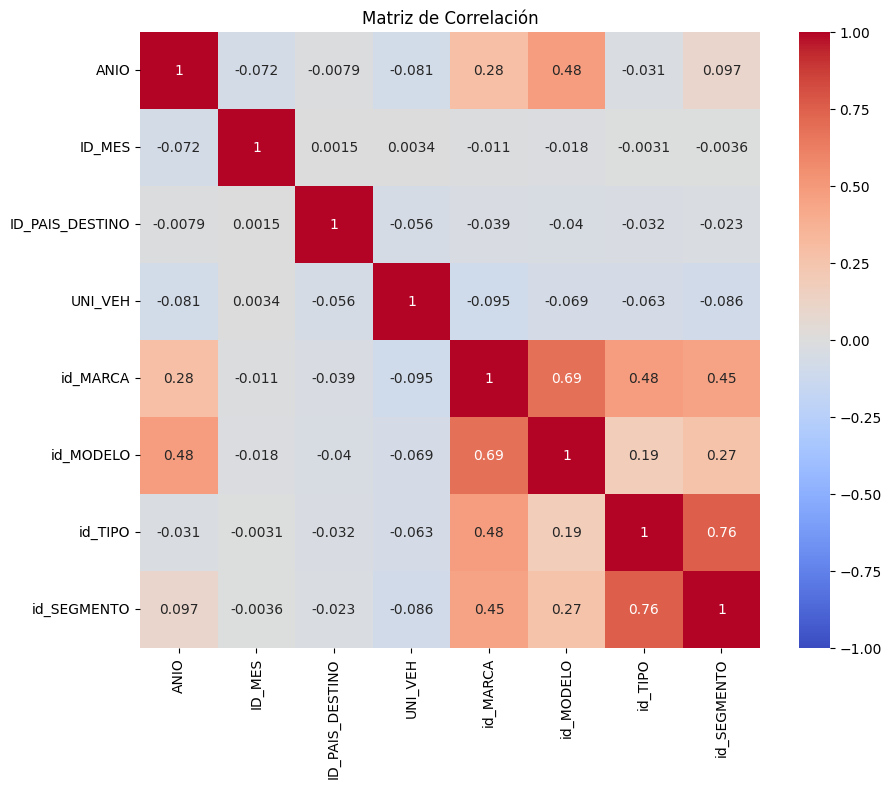

In [41]:
corr_matriz = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matriz, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()

### Componentes principales (PCA)

Varianza explicada por cada componente: [0.31963947 0.17247679 0.13182354]


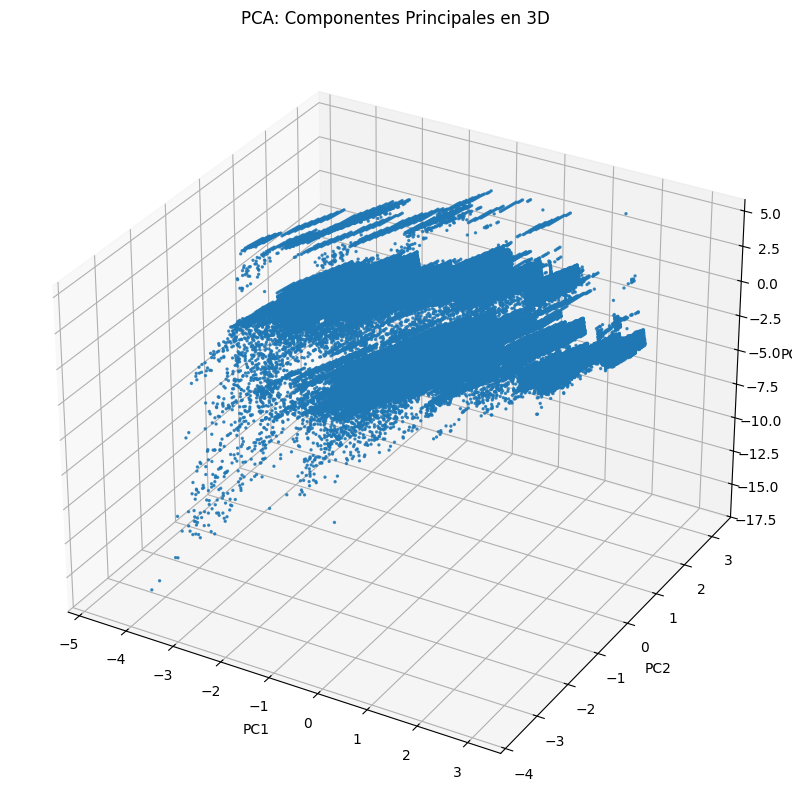

In [48]:
df_scaler = df.copy()

scaler = StandardScaler()
# Ensure only numeric columns are scaled
numeric_columns = df_scaler.select_dtypes(include=['number']).columns
scaled_data = scaler.fit_transform(df_scaler[numeric_columns])
pca = PCA(n_components=3)  # Reducir a 3 componentes principales
pca_data = pca.fit_transform(scaled_data)
print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)
pca_df = pd.DataFrame(data=pca_data, columns=['p1', 'p2', 'p3'])


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df.p1, pca_df.p2, pca_df.p3, alpha=0.8, s=2)
ax.set_title('PCA: Componentes Principales en 3D')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

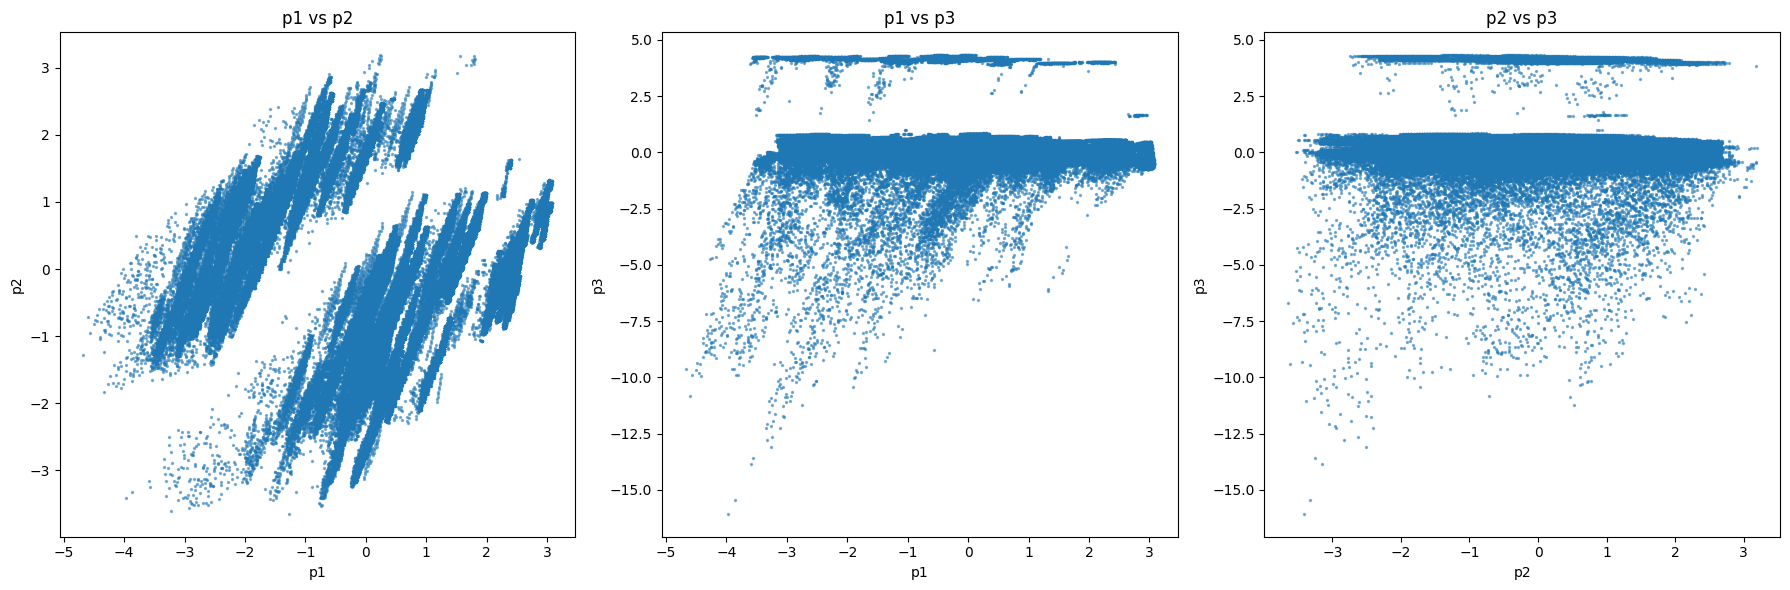

In [49]:
# Graficar combinaciones de las variables p1, p2 y p3
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Gráfico de p1 vs p2
axes[0].scatter(pca_df['p1'], pca_df['p2'], alpha=0.5, s=2)
axes[0].set_title('p1 vs p2')
axes[0].set_xlabel('p1')
axes[0].set_ylabel('p2')

# Gráfico de p1 vs p3
axes[1].scatter(pca_df['p1'], pca_df['p3'], alpha=0.5, s=2)
axes[1].set_title('p1 vs p3')
axes[1].set_xlabel('p1')
axes[1].set_ylabel('p3')

# Gráfico de p2 vs p3
axes[2].scatter(pca_df['p2'], pca_df['p3'], alpha=0.5, s=2)
axes[2].set_title('p2 vs p3')
axes[2].set_xlabel('p2')
axes[2].set_ylabel('p3')

plt.tight_layout()
plt.show()

### Histogramas de columnas categoricas

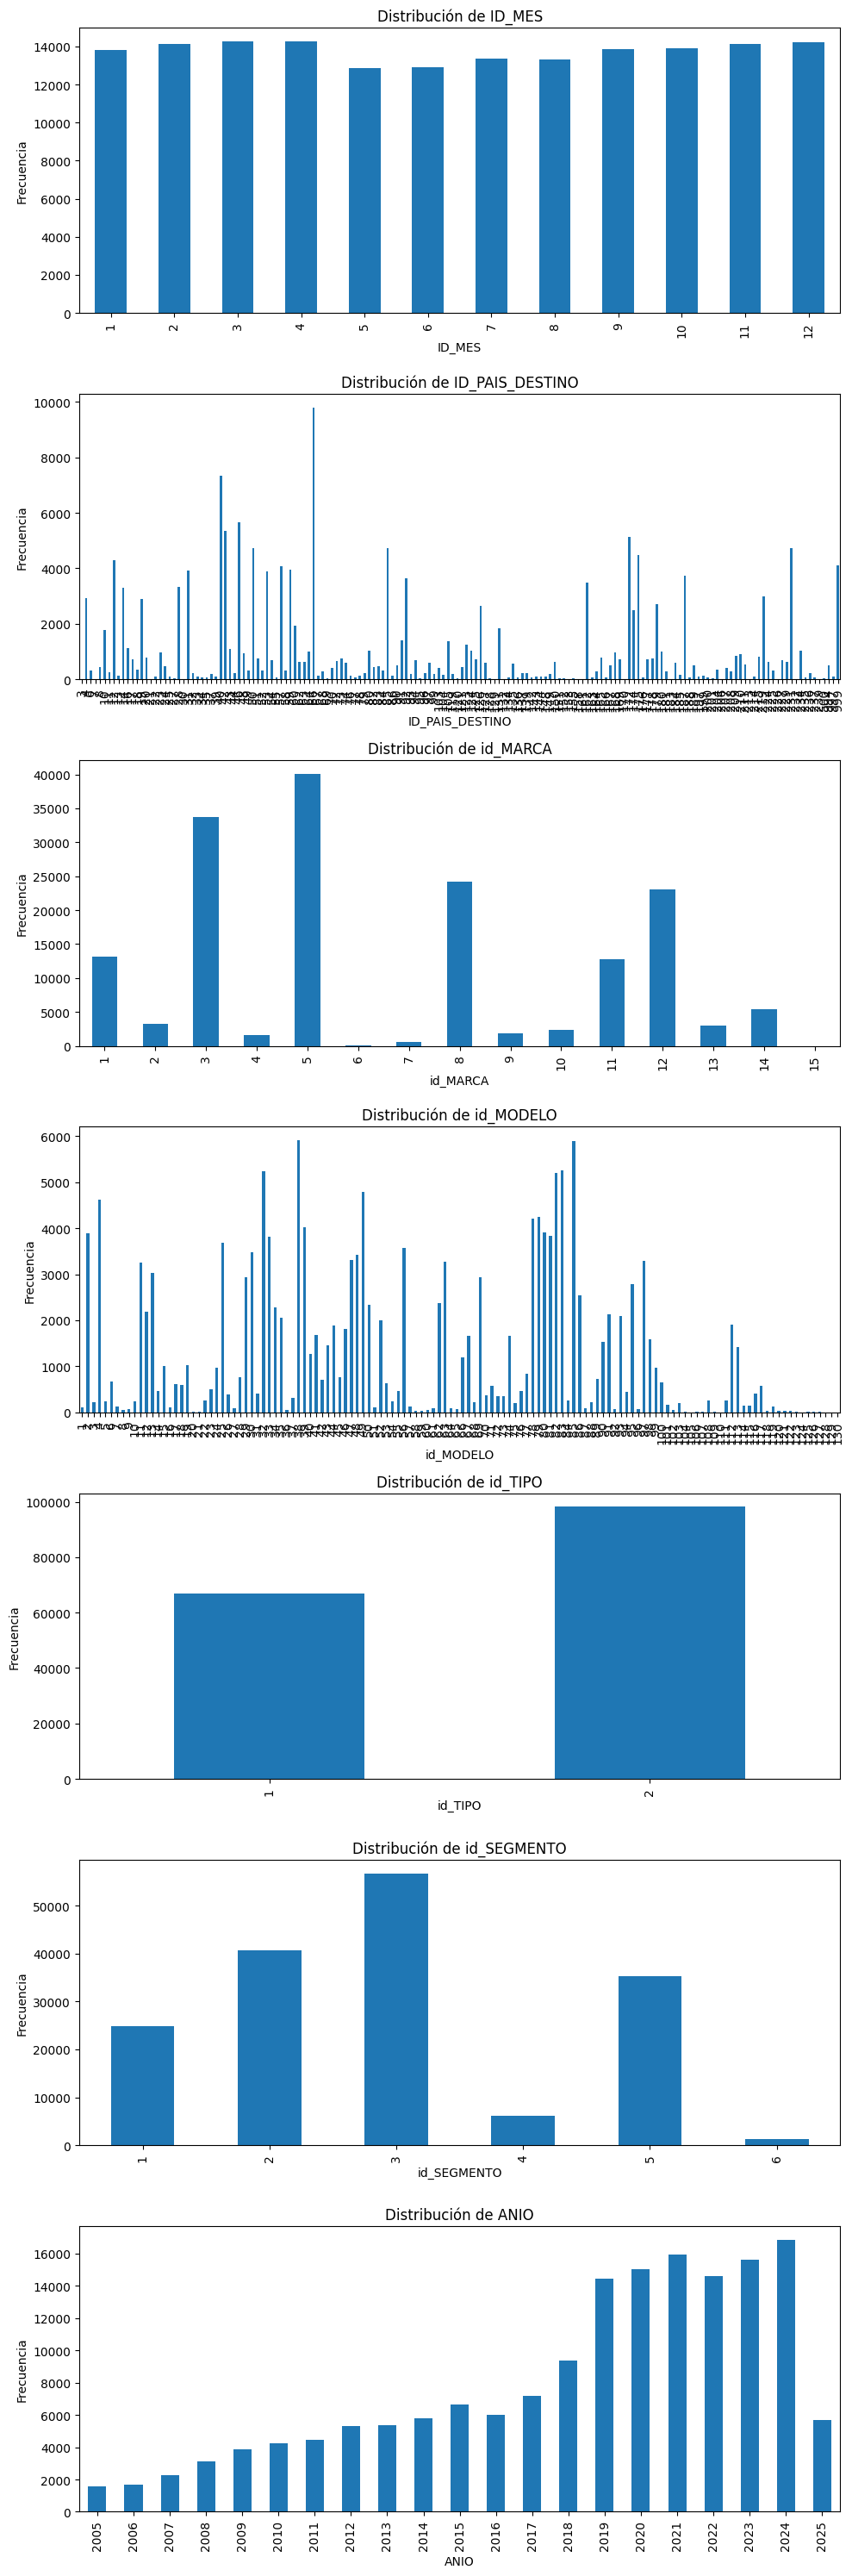

In [50]:
columns_to_plot = ['ID_MES', 'ID_PAIS_DESTINO', 'id_MARCA', 'id_MODELO', 'id_TIPO', 'id_SEGMENTO', 'ANIO']

fig, axes = plt.subplots(len(columns_to_plot), 1, figsize=(10, 30))

for i, column in enumerate(columns_to_plot):
    df[column].value_counts().sort_index().plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Distribución de {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

### Graficos de caja

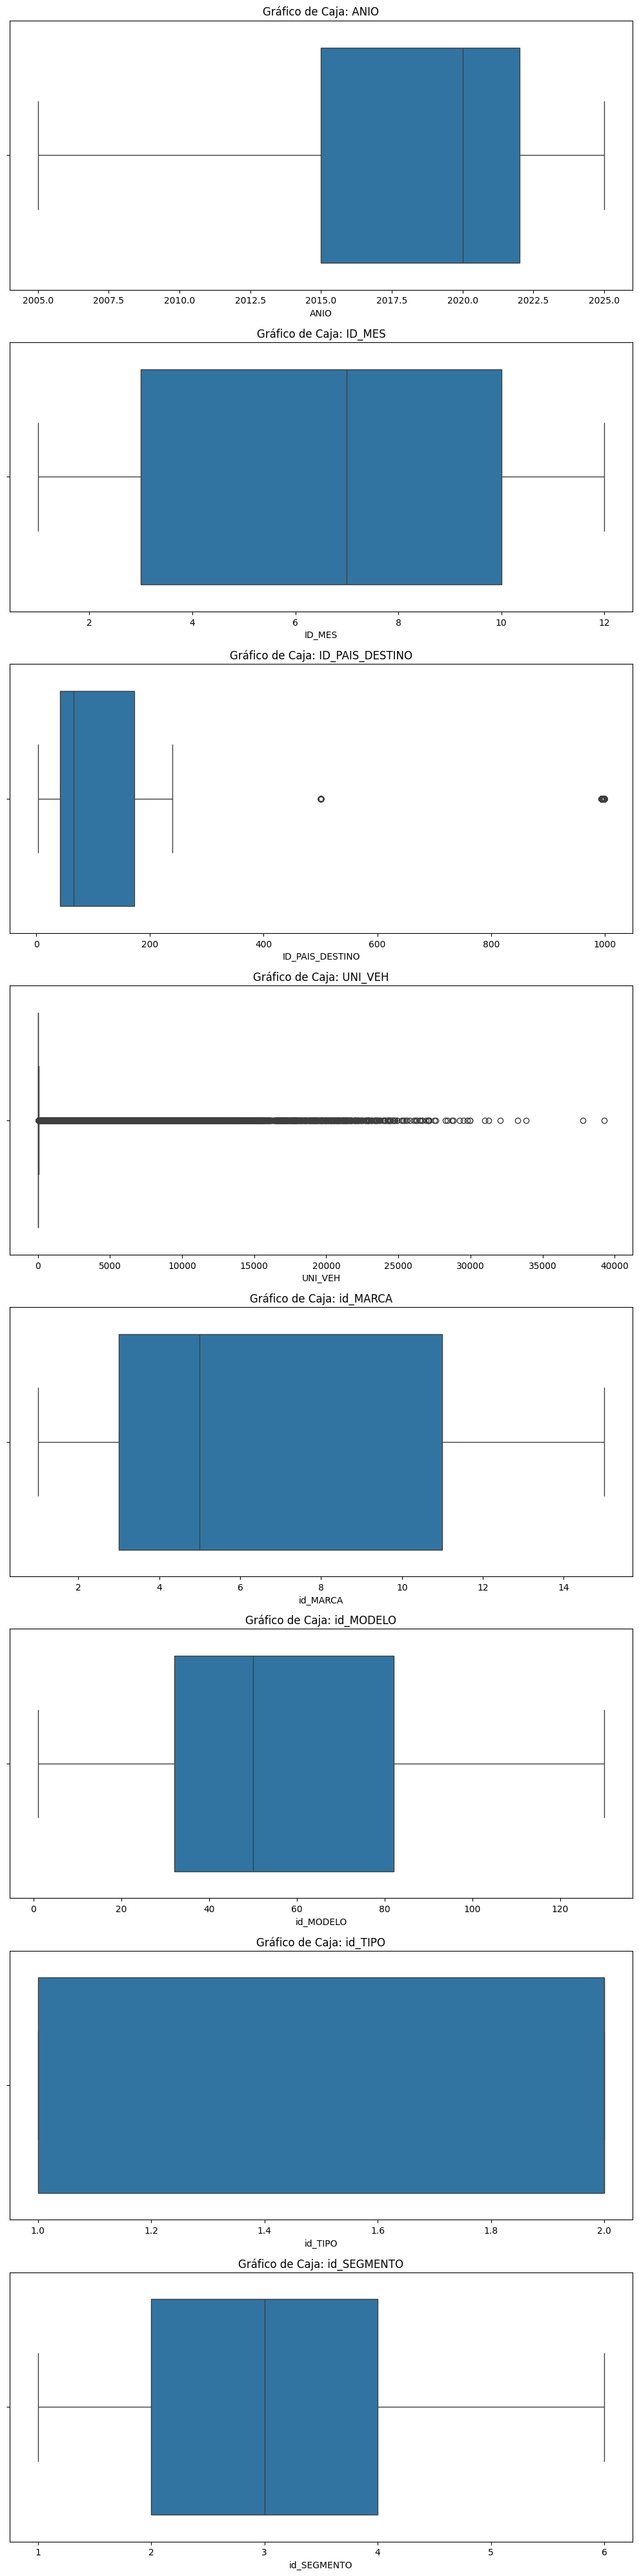

In [51]:
# Crear gráficos de caja para las columnas numéricas
numeric_columns = df.select_dtypes(include=['number']).columns

fig, axes = plt.subplots(len(numeric_columns), 1, figsize=(10, 5 * len(numeric_columns)))

for i, column in enumerate(numeric_columns):
    sns.boxplot(data=df, x=column, ax=axes[i])
    axes[i].set_title(f'Gráfico de Caja: {column}')
    axes[i].set_xlabel(column)

plt.tight_layout()
plt.show()

In [ ]:
from ipywidgets import interact
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt

# Función para gráfico de dispersión 2D
def scatter_2d(x_col, y_col):
    plt.figure(figsize=(8, 6))
    plt.scatter(df[x_col], df[y_col], alpha=0.5)
    plt.title(f'Dispersión 2D: {x_col} vs {y_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.grid(True)
    plt.show()

# Función para gráfico de dispersión 3D
def scatter_3d(x_col, y_col, z_col):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df[x_col], df[y_col], df[z_col], alpha=0.5)
    ax.set_title(f'Dispersión 3D: {x_col} vs {y_col} vs {z_col}')
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_zlabel(z_col)
    plt.show()

# Crear widgets interactivos
numeric_columns = df.select_dtypes(include=['number']).columns

interact(scatter_2d, x_col=numeric_columns, y_col=numeric_columns)
interact(scatter_3d, x_col=numeric_columns, y_col=numeric_columns, z_col=numeric_columns)